<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/oilVisco_pybrain_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ANN

/content/drive/My Drive/ANN


In [3]:
!git clone https://github.com/angular/angular-phonecat.git

fatal: destination path 'angular-phonecat' already exists and is not an empty directory.


In [4]:
cd /content/drive/My Drive/pybrain

/content/drive/My Drive/pybrain


In [5]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [6]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import pandas as pd

In [7]:
cd /content/drive/My Drive

/content/drive/My Drive


In [8]:
df = pd.read_excel('oil visco.xlsx')

In [9]:
df

,T,P,Visco
0,135.0,NaN,11.000000
1,241.0,NaN,NaN
2,241.0,NaN,0.300000
3,190.0,NaN,0.300000
4,115.0,NaN,0.600000
...,...,...,...
537,205.0,826.0,4.362874
538,205.0,623.0,4.545747
539,205.0,420.0,4.959175
540,205.0,214.0,5.726539


#data cleaning

In [10]:
import numpy as np

In [11]:
def fillnanP(col):
    if pd.isnull(col):
      return (df['P']!=np.NAN).mean()
    else:
      return col

In [12]:
def fillnanT(col):
    if pd.isnull(col):
      return (df['T']!=np.NAN).mean()
    else:
      return col

In [13]:
df['P'] = df['P'].apply(fillnanP)

In [14]:
df['T'] = df['T'].apply(fillnanT)

In [16]:
df.dropna(inplace=True)

In [17]:
df

,T,P,Visco
0,135.0,1.0,11.000000
2,241.0,1.0,0.300000
3,190.0,1.0,0.300000
4,115.0,1.0,0.600000
5,190.0,1.0,0.700000
...,...,...,...
537,205.0,826.0,4.362874
538,205.0,623.0,4.545747
539,205.0,420.0,4.959175
540,205.0,214.0,5.726539


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 541
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       495 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 15.5 KB


# test train split and scaling

In [19]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Visco', axis=1), df['Visco'], test_size=0.1, random_state=100)

In [23]:
scaler = MinMaxScaler()

In [29]:
scaler = MinMaxScaler(feature_range=(0,20))
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train.max() , X_train.min()

(20.0, 0.0)

In [31]:
X_test.max() , X_test.min()

(20.0, 0.0)

In [32]:
y_test.max() , y_test.min()

(19.6, 0.2)

In [33]:
import seaborn as sns

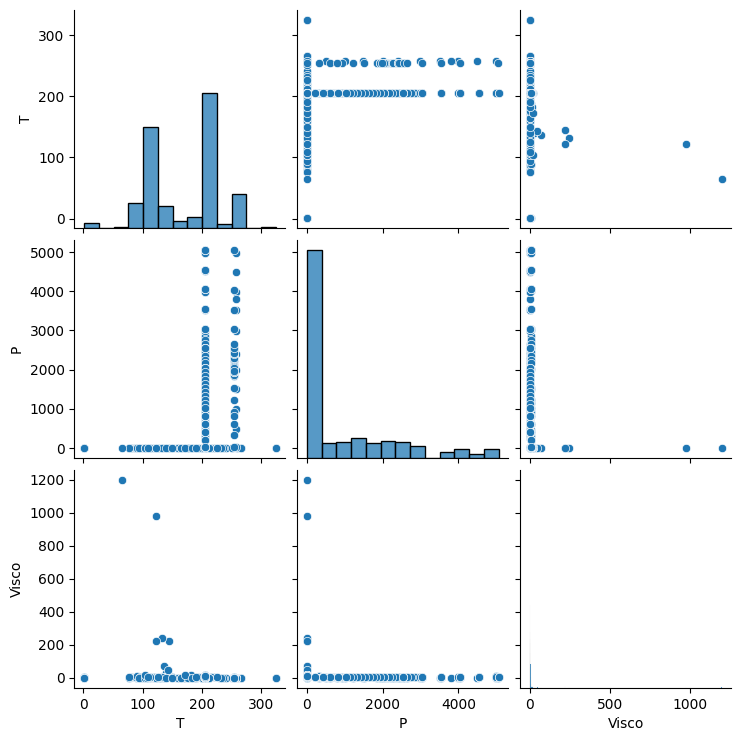

In [34]:
sns.pairplot(df)

<Axes: xlabel='P', ylabel='Visco'>

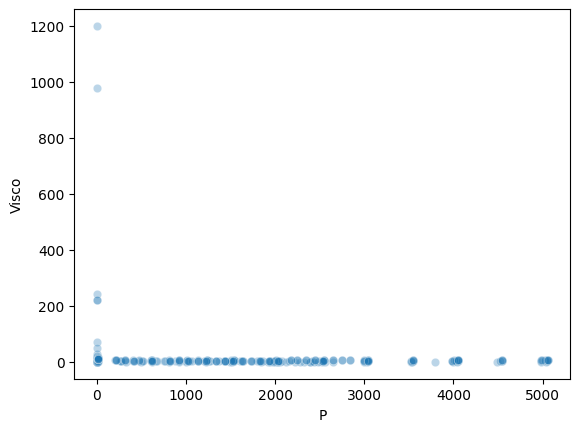

In [35]:
sns.scatterplot(data=df, x='P', y='Visco', alpha=0.3)

<Axes: xlabel='T', ylabel='Visco'>

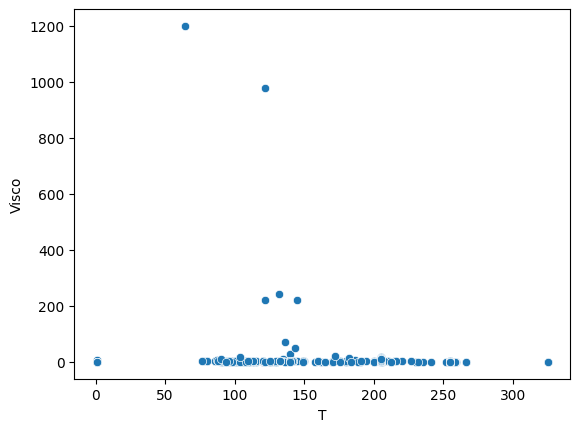

In [36]:
sns.scatterplot(data=df, x='T', y='Visco')

In [37]:
df.corr()

,T,P,Visco
T,1.000000,0.571422,-0.082145
P,0.571422,1.000000,-0.046442
Visco,-0.082145,-0.046442,1.000000


In [39]:
df.corr()['Visco']

T       -0.082145
P       -0.046442
Visco    1.000000
Name: Visco, dtype: float64

#Create a dataset that matches network input and output sizes

In [40]:
len(y_test)

50

In [41]:
len(X_test)

50

In [42]:
data = df.values

train_data = data[:,0:2]
train_output = data[:,2]

In [ ]:
print(train_data)
print(train_output)

In [44]:
from pybrain.tools.shortcuts import buildNetwork
nn = buildNetwork(2, 3, 1, bias=True, hiddenclass=TanhLayer)

In [45]:
from pybrain.datasets import SupervisedDataSet
gate = SupervisedDataSet(2, 1)
print(gate)

input: dim(0, 2)
[]

target: dim(0, 1)
[]




In [46]:
# Add input and target values to dataset
# Values for NOR truth table
for i in range(0, len(train_output)) :
   gate.addSample(train_data[i], train_output[i])


In [47]:
#Training the network with dataset
trainer = BackpropTrainer(nn, gate)

In [48]:
# will run the loop 1000 times to train it.
for epoch in range(1000):
   trainer.train()

In [49]:
trainer

<BackpropTrainer 'BackpropTrainer-9'>

In [50]:
trainer.testOnData(dataset=gate, verbose = True)


Testing on data:
('out:    ', '[3.772 ]')
('correct:', '[11    ]')
error:  26.12153523
('out:    ', '[3.772 ]')
('correct:', '[0.3   ]')
error:  6.02761142
('out:    ', '[3.772 ]')
('correct:', '[0.3   ]')
error:  6.02761142
('out:    ', '[3.772 ]')
('correct:', '[0.6   ]')
error:  5.03099246
('out:    ', '[3.772 ]')
('correct:', '[0.7   ]')
error:  4.71878614
('out:    ', '[3.772 ]')
('correct:', '[0.4   ]')
error:  5.68540510
('out:    ', '[3.772 ]')
('correct:', '[0.1   ]')
error:  6.74202406
('out:    ', '[3.772 ]')
('correct:', '[1.5   ]')
error:  2.58113558
('out:    ', '[3.772 ]')
('correct:', '[1.4   ]')
error:  2.81334190
('out:    ', '[3.772 ]')
('correct:', '[1.7   ]')
error:  2.14672294
('out:    ', '[3.772 ]')
('correct:', '[1     ]')
error:  3.84216718
('out:    ', '[3.772 ]')
('correct:', '[2     ]')
error:  1.57010398
('out:    ', '[3.772 ]')
('correct:', '[2     ]')
error:  1.57010398
('out:    ', '[3.772 ]')
('correct:', '[2.3   ]')
error:  1.08348503
('out:    ', '[

2571.68283704985

#FNN

In [51]:
#Adding Modules and Connections

from pybrain.structure import FeedForwardNetwork
from pybrain.structure import LinearLayer, SigmoidLayer
from pybrain.structure import FullConnection


In [52]:
network = FeedForwardNetwork()

In [53]:
#creating layer for input => 2 , hidden=> 3 and output=>1
inputLayer = LinearLayer(2)
hiddenLayer = SigmoidLayer(3)
outputLayer = LinearLayer(1)

In [54]:
#adding the layer to feedforward network
network.addInputModule(inputLayer)
network.addModule(hiddenLayer)
network.addOutputModule(outputLayer)

In [55]:
#Create connection between input ,hidden and output
input_to_hidden = FullConnection(inputLayer, hiddenLayer)
hidden_to_output = FullConnection(hiddenLayer, outputLayer)

In [56]:
#add connection to the network
network.addConnection(input_to_hidden)
network.addConnection(hidden_to_output)
network.sortModules()

In [57]:
print(network)

FeedForwardNetwork-16
   Modules:
    [<LinearLayer 'LinearLayer-13'>, <SigmoidLayer 'SigmoidLayer-17'>, <LinearLayer 'LinearLayer-18'>]
   Connections:
    [<FullConnection 'FullConnection-14': 'SigmoidLayer-17' -> 'LinearLayer-18'>, <FullConnection 'FullConnection-15': 'LinearLayer-13' -> 'SigmoidLayer-17'>]



In [59]:
#Training Network Using Optimization Algorithms
from pybrain.datasets import SupervisedDataSet
from pybrain.optimization.populationbased.ga import GA
from pybrain.tools.shortcuts import buildNetwork

In [60]:
import numpy as np

In [61]:
ga = GA(gate.evaluateModuleMSE, nn, minimize=True)

In [62]:
for i in range(0, len(train_output)) :
   gate.addSample(train_data[i], train_output[i])

In [63]:
for i in range(100):
    net = ga.learn(0)[0]

In [ ]:
train_data

In [ ]:
train_output

In [ ]:
for i in range(0, len(train_output)) :
  print(net.activate(train_data[i]))

# Evaluate

In [151]:
# net.activate(train_data[i] vs train_output

In [158]:
# Define a function to evaluate the predictions
# def evaluate_predictions(predictions, targets):
#     num_samples = len(targets)
#     correct_predictions = sum(predictions == targets)
#     accuracy = correct_predictions / num_samples
#     return accuracy

In [162]:
# predictions = []
# for sample in gate:
#     prediction = net.activate(sample[0])
#     predictions.append(round(prediction[0]))  # Convert to binary prediction

# targets = [int(sample[1][0]) for sample in gate]

# accuracy = evaluate_predictions(predictions, targets)
# print(f"Accuracy: {accuracy:.2f}")

In [67]:
predictions = np.array([net.activate(sample[0]) for sample in gate])
targets = np.array([sample[1] for sample in gate])

In [68]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - targets))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 8.13


In [69]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((predictions - targets)**2))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 71.72
